In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np

In [2]:
def create_map() -> plt.Figure:
    """
    Creates a map of the US with borders of states.

    return: a figure object
    """

    us_map = Basemap(
        llcrnrlon=-119,
        llcrnrlat=22,
        urcrnrlon=-64,
        urcrnrlat=49,
        projection="lcc",
        lat_1=33,
        lat_2=45,
        lon_0=-95,
    )

    # load the shapefile, use the name 'states'
    us_map.readshapefile(
        "../../../resources/shapefiles/us/st99_d00", name="states", drawbounds=True
    )

    return us_map


def update_state_color(us_map, state_name: str, color: str, ax: plt.Axes) -> None:
    """
    Updates the color of a state in the map.

    :param us_map: The map object.
    :param state_name: The name of the state to color.
    :param color: The color to update the state to.
    :param ax: The axis object.
    """
    # create a list with state names
    state_names = []
    for shape_dict in us_map.states_info:
        state_names.append(shape_dict["NAME"])

    state_index = state_names.index(state_name)

    seg = us_map.states[state_index]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

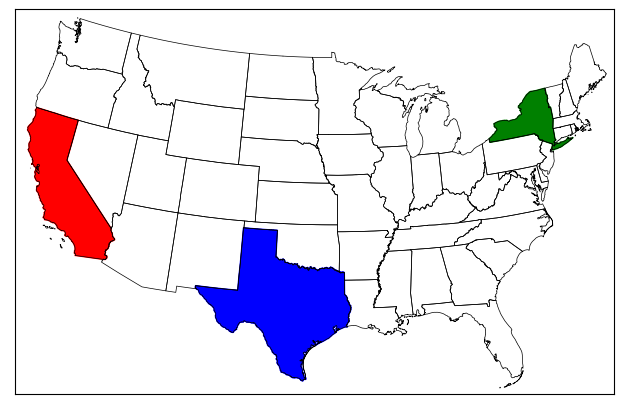

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
us_map = create_map()


# update the color of the states
update_state_color(us_map, "California", "red", ax)
update_state_color(us_map, "Texas", "blue", ax)
update_state_color(us_map, "New York", "green", ax)

plt.show()